In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [56]:
df= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/State_population_area_literacy.csv')
df

,States/UT,Districts,Population,Area,Literacy
0,Uttar Pradesh,71 Districts,19.98 Cr,"240,928 Km2",67.68%
1,Maharashtra,35 Districts,11.24 Cr,"307,713 Km2",82.34%
2,Bihar,38 Districts,10.41 Cr,"94,163 Km2",61.80%
3,West Bengal,19 Districts,9.13 Cr,"88,752 Km2",76.26%
4,Andhra Pradesh,23 Districts,8.46 Cr,"275,045 Km2",67.02%
5,Madhya Pradesh,50 Districts,7.26 Cr,"308,252 Km2",69.32%
6,Tamil Nadu,32 Districts,7.21 Cr,"130,060 Km2",80.09%
7,Rajasthan,33 Districts,6.85 Cr,"342,239 Km2",66.11%
8,Karnataka,30 Districts,6.11 Cr,"191,791 Km2",75.36%
9,Gujarat,26 Districts,6.04 Cr,"196,244 Km2",78.03%


Here run the csv file to get the dataset.

In [57]:
df_crime_rate= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/crime%20rate%20in%20india.csv')
df_crime_rate

,States/UT,2018,2019,2020,2021,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,A&N Islands,934.1,1013.6,637.1,332.2,NaN,NaN,NaN,NaN,NaN
1,Andhra Pradesh,278.1,278.6,452.7,420.4,NaN,NaN,NaN,NaN,NaN
2,Arunachal Pradesh,188.7,190.9,164.5,197.7,NaN,NaN,NaN,NaN,NaN
3,Assam,354.2,385.8,349.5,379.0,NaN,NaN,NaN,NaN,NaN
4,Bihar,222.1,224,211.3,228.0,NaN,NaN,NaN,NaN,NaN
5,Chandigarh,510,381.6,271.6,247.1,NaN,NaN,NaN,NaN,NaN
6,Chhattisgarh,345.1,334.7,352.9,373.7,NaN,NaN,NaN,NaN,NaN
7,D&N Haveli and Daman & Diu,-,-,51.3,52.3,NaN,NaN,NaN,NaN,NaN
8,Delhi,1342.5,1586.1,1309.5,1479.9,NaN,NaN,NaN,NaN,NaN
9,Goa,253.2,241.5,281.1,191.6,NaN,NaN,NaN,NaN,NaN


Again run the csv file to get the crime dataset which shows the different types of crime in India and total crimes.

In [58]:
df_crime_types= pd.read_csv('https://raw.githubusercontent.com/priyapandey12345/Capstone/main/Types%20of%20crime%20in%20india.csv')
df_crime_types

,States/UT,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
0,A&N Islands,21.9,4.0,7.9,1.7,110.4,0.5,0.5,0.7,0.7,0.0,148.3
1,Andhra Pradesh,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,44.0
2,Arunachal Pradesh,32.0,3.2,11.1,5.5,27.5,5.3,3.3,2.6,2.9,0.1,93.5
3,Assam,76.6,3.4,10.0,21.6,43.7,3.9,5.4,4.2,2.9,0.5,172.2
4,Bihar,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,67.7
5,Chandigarh,29.9,1.4,13.3,12.7,72.2,0.2,1.4,2.7,7.3,1.7,142.8
6,Chhattisgarh,28.6,3.4,7.4,9.1,61.6,0.3,1.9,6.0,3.7,0.4,122.4
7,D&N Haveli and Daman & Diu,9.8,1.3,0.8,4.3,54.1,0.2,1.0,2.5,0.0,0.0,74.0
8,Delhi,57.0,2.2,12.9,26.7,128.5,0.8,11.3,2.8,1.4,6.9,250.5
9,Goa,22.1,1.7,9.3,3.3,39.5,0.2,1.7,1.5,4.1,0.3,83.7


In [59]:
merged_data = pd.merge(df, df_crime_types, how='left', on='States/UT')


In [60]:
merged_data.head()

,States/UT,Districts,Population,Area,Literacy,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
0,Uttar Pradesh,71 Districts,19.98 Cr,"240,928 Km2",67.68%,22.7,1.6,2.6,6.3,19.7,0.3,0.8,6.3,2.1,11.8,74.2
1,Maharashtra,35 Districts,11.24 Cr,"307,713 Km2",82.34%,35.1,1.9,4.2,8.4,47.8,0.8,4.9,2.6,1.2,0.6,107.5
2,Bihar,38 Districts,10.41 Cr,"94,163 Km2",61.80%,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,67.7
3,West Bengal,19 Districts,9.13 Cr,"88,752 Km2",76.26%,48.7,1.9,2.3,8.5,31.7,0.5,0.3,0.1,1.4,1.8,97.2
4,Andhra Pradesh,23 Districts,8.46 Cr,"275,045 Km2",67.02%,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,44.0


In [61]:
x=merged_data[['Total crimes', 'Literacy']]
x.head()

,Total crimes,Literacy
0,74.2,67.68%
1,107.5,82.34%
2,67.7,61.80%
3,97.2,76.26%
4,44.0,67.02%


Here need to merge the dataset to get required datas.

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
x.isnull().sum()

Total crimes    4
Literacy        0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder


In [65]:
LE = LabelEncoder()
x['Total crimes'] = LE.fit_transform(x ['Total crimes'])

Used the LabelEncoder to encode the dataset to proceed the further. 

In [66]:
LE = LabelEncoder()
x['Literacy'] = LE.fit_transform(x ['Literacy'])

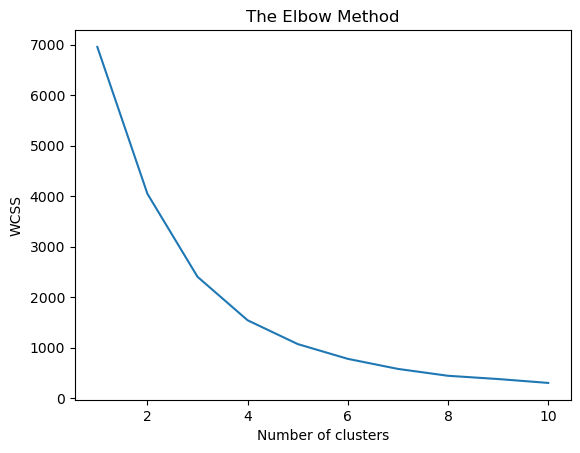

In [67]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above plot is used for verify the number of clusters and WCSS using the Elbow method. On x axis we can see number o clusters and on Y axis we can see WCSS.

In [68]:
x.head()

,Total crimes,Literacy
0,11,6
1,24,23
2,8,0
3,22,16
4,2,4


In [69]:
kmeans=KMeans(n_clusters=3, random_state=42)
y_kmeans= kmeans.fit_predict(x)
print(y_kmeans)

[2 1 2 0 2 0 2 0 2 2 0 1 2 0 2 0 0 1 2 1 1 1 2 2 2 1 0 2 1 1 1 1 0 1 1]


In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(x,y_kmeans)

0.4063833409333393

In [72]:
cluster_5_Literacy=merged_data[y_kmeans==5]
print(cluster_5_Literacy)

Empty DataFrame
Columns: [States/UT, Districts, Population, Area, Literacy, Violent Crimes, Murder, Rape, Kidnapping, Crimes Against Children, Extortion, Robbery, Hit & Run, Drugs Trafficking, Illegal Arms, Total crimes]
Index: []


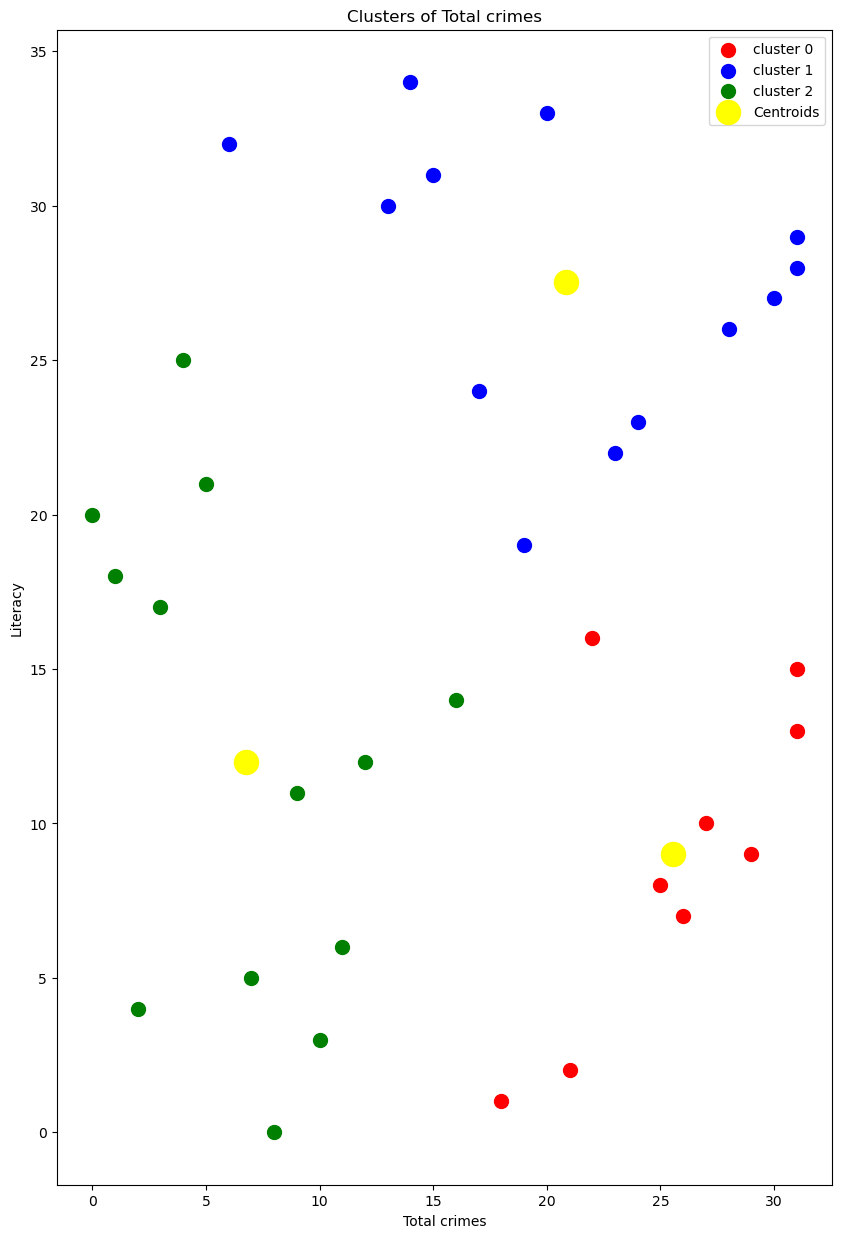

In [76]:
plt.figure(figsize=(10, 15))
plt.scatter(x[y_kmeans == 0]['Total crimes'], x[y_kmeans == 0]['Literacy'], s=100, c='red', label='cluster 0')
plt.scatter(x[y_kmeans == 1]['Total crimes'], x[y_kmeans == 1]['Literacy'], s=100, c='blue', label='cluster 1')
plt.scatter(x[y_kmeans == 2]['Total crimes'], x[y_kmeans == 2]['Literacy'], s=100, c='green', label='cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Total crimes')
plt.xlabel('Total crimes')
plt.ylabel('Literacy')
plt.legend()
plt.show()


Creating clusters for sensitive, moderate, and peaceful areas involves grouping locations based on certain criteria. The criteria can vary depending on the context and what is considered relevant for classifying areas. Above scatterplot has been used for total crimes and literacy. On x axis we can analyse the total crimes and on Y axis we can see the Literacy rates. We have created the cluster for total crimes.

In [80]:
Sensitive_area=merged_data[y_kmeans==0]
Moderate_area=merged_data[y_kmeans==1]
Peaceful_area=merged_data[y_kmeans==2]

Sensitive areas are ranked as 0, moderate area ranked as 1 and peaceful areas are ranked as 2.

In [81]:
Sensitive_area.head()

,States/UT,Districts,Population,Area,Literacy,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
3,West Bengal,19 Districts,9.13 Cr,"88,752 Km2",76.26%,48.7,1.9,2.3,8.5,31.7,0.5,0.3,0.1,1.4,1.8,97.2
5,Madhya Pradesh,50 Districts,7.26 Cr,"308,252 Km2",69.32%,30.7,2.4,7.2,11.2,66.7,0.5,1.4,8.8,2.3,3.0,134.2
7,Rajasthan,33 Districts,6.85 Cr,"342,239 Km2",66.11%,29.0,2.2,16.4,9.7,27.2,1.2,1.9,3.1,2.5,3.3,96.5
10,Odisha,30 Districts,4.2 Cr,"155,707 Km2",72.87%,48.6,3.0,6.4,12.3,54.8,2.3,6.1,2.1,3.2,0.5,139.3
13,Assam,27 Districts,3.12 Cr,"78,438 Km2",72.19%,76.6,3.4,10.0,21.6,43.7,3.9,5.4,4.2,2.9,0.5,172.2


In [82]:
Moderate_area.head()

,States/UT,Districts,Population,Area,Literacy,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
1,Maharashtra,35 Districts,11.24 Cr,"307,713 Km2",82.34%,35.1,1.9,4.2,8.4,47.8,0.8,4.9,2.6,1.2,0.6,107.5
11,Kerala,14 Districts,3.34 Cr,"38,852 Km2",94%,23.8,0.9,4.2,1.0,48.2,0.2,2.2,0.4,1.7,0.1,82.7
17,Delhi,9 Districts,1.68 Cr,"1,483 Km2",86.21%,57.0,2.2,12.9,26.7,128.5,0.8,11.3,2.8,1.4,6.9,250.5
19,Uttarakhand,13 Districts,1.01 Cr,"53,483 Km2",78.82%,27.6,1.8,9.6,7.2,32.8,0.1,1.5,4.2,2.4,7.3,94.5
20,Himachal Pradesh,12 Districts,68.6 Lacs,"55,673 Km2",82.80%,23.8,1.2,9.8,5.8,34.4,0.1,0.1,0.9,14.7,0.1,90.9


In [83]:
Peaceful_area.head()

,States/UT,Districts,Population,Area,Literacy,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit & Run,Drugs Trafficking,Illegal Arms,Total crimes
0,Uttar Pradesh,71 Districts,19.98 Cr,"240,928 Km2",67.68%,22.7,1.6,2.6,6.3,19.7,0.3,0.8,6.3,2.1,11.8,74.2
2,Bihar,38 Districts,10.41 Cr,"94,163 Km2",61.80%,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5,67.7
4,Andhra Pradesh,23 Districts,8.46 Cr,"275,045 Km2",67.02%,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1,44.0
6,Tamil Nadu,32 Districts,7.21 Cr,"130,060 Km2",80.09%,16.2,2.2,1.1,1.1,29.3,2.2,3.3,1.5,2.5,0.2,59.6
8,Karnataka,30 Districts,6.11 Cr,"191,791 Km2",75.36%,22.8,2.0,1.7,4.3,37.5,0.2,2.4,1.6,1.8,0.2,74.5


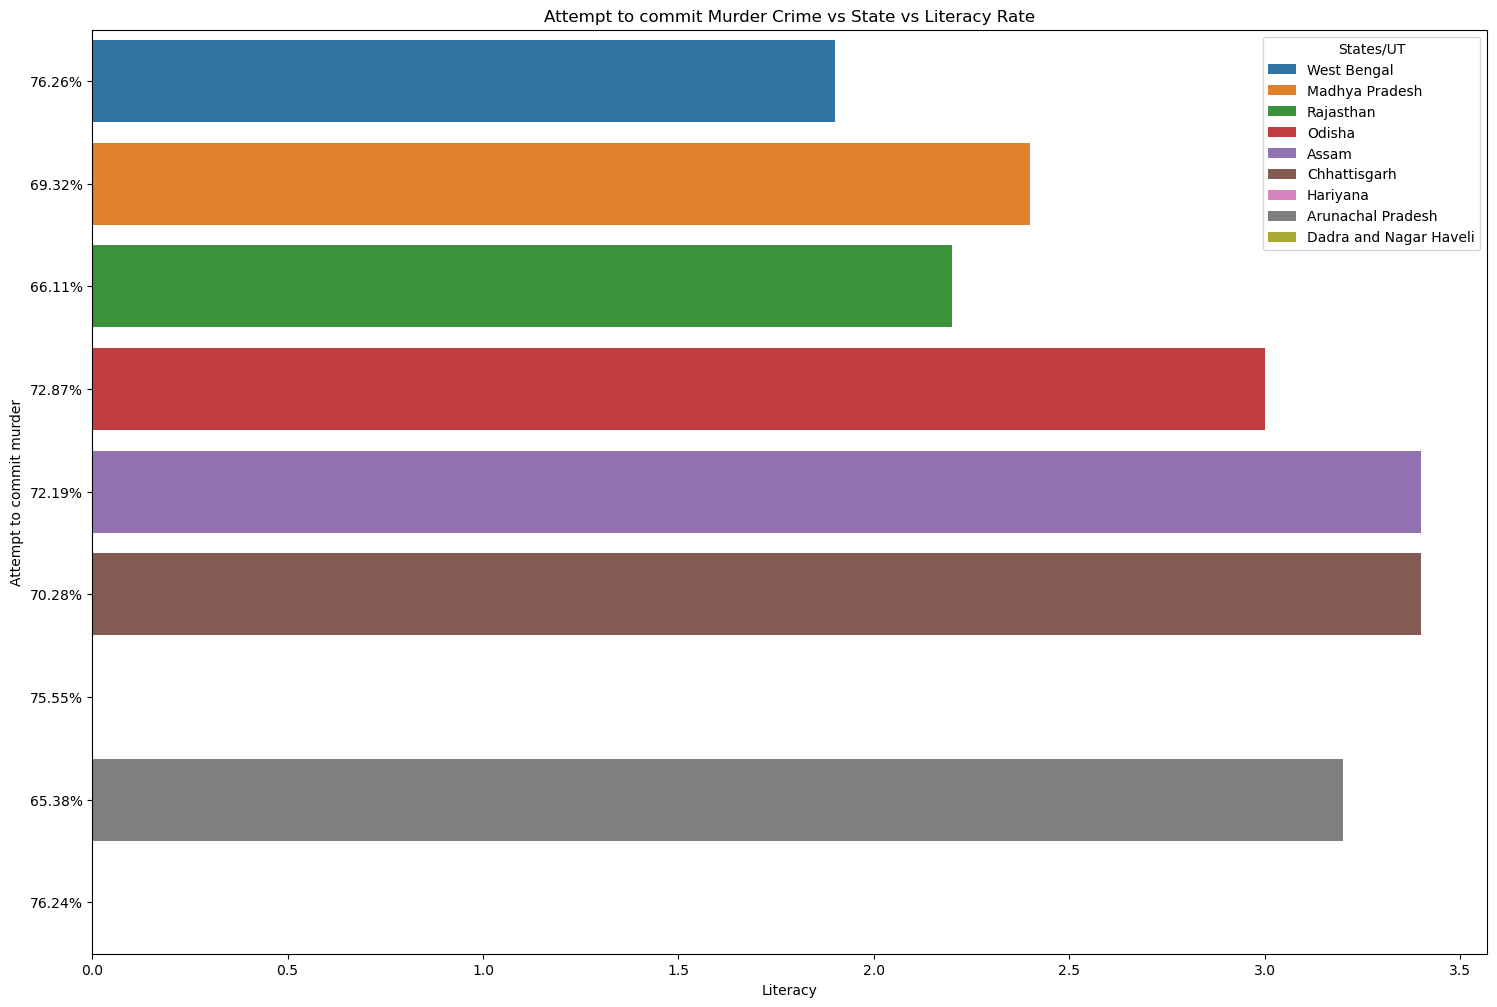

In [85]:
plt.figure(figsize=(18,12))
sns.barplot(x='Murder', y='Literacy', hue='States/UT', data=Sensitive_area, dodge=False)
plt.title('Attempt to commit Murder Crime vs State vs Literacy Rate')
plt.xlabel('Literacy')
plt.ylabel('Attempt to commit murder')
plt.show()

Above barplot has been used for muder and literacy rate. On x axis of barplot we can se the literacy rates and on y axis we can see murders for each states and union territory.

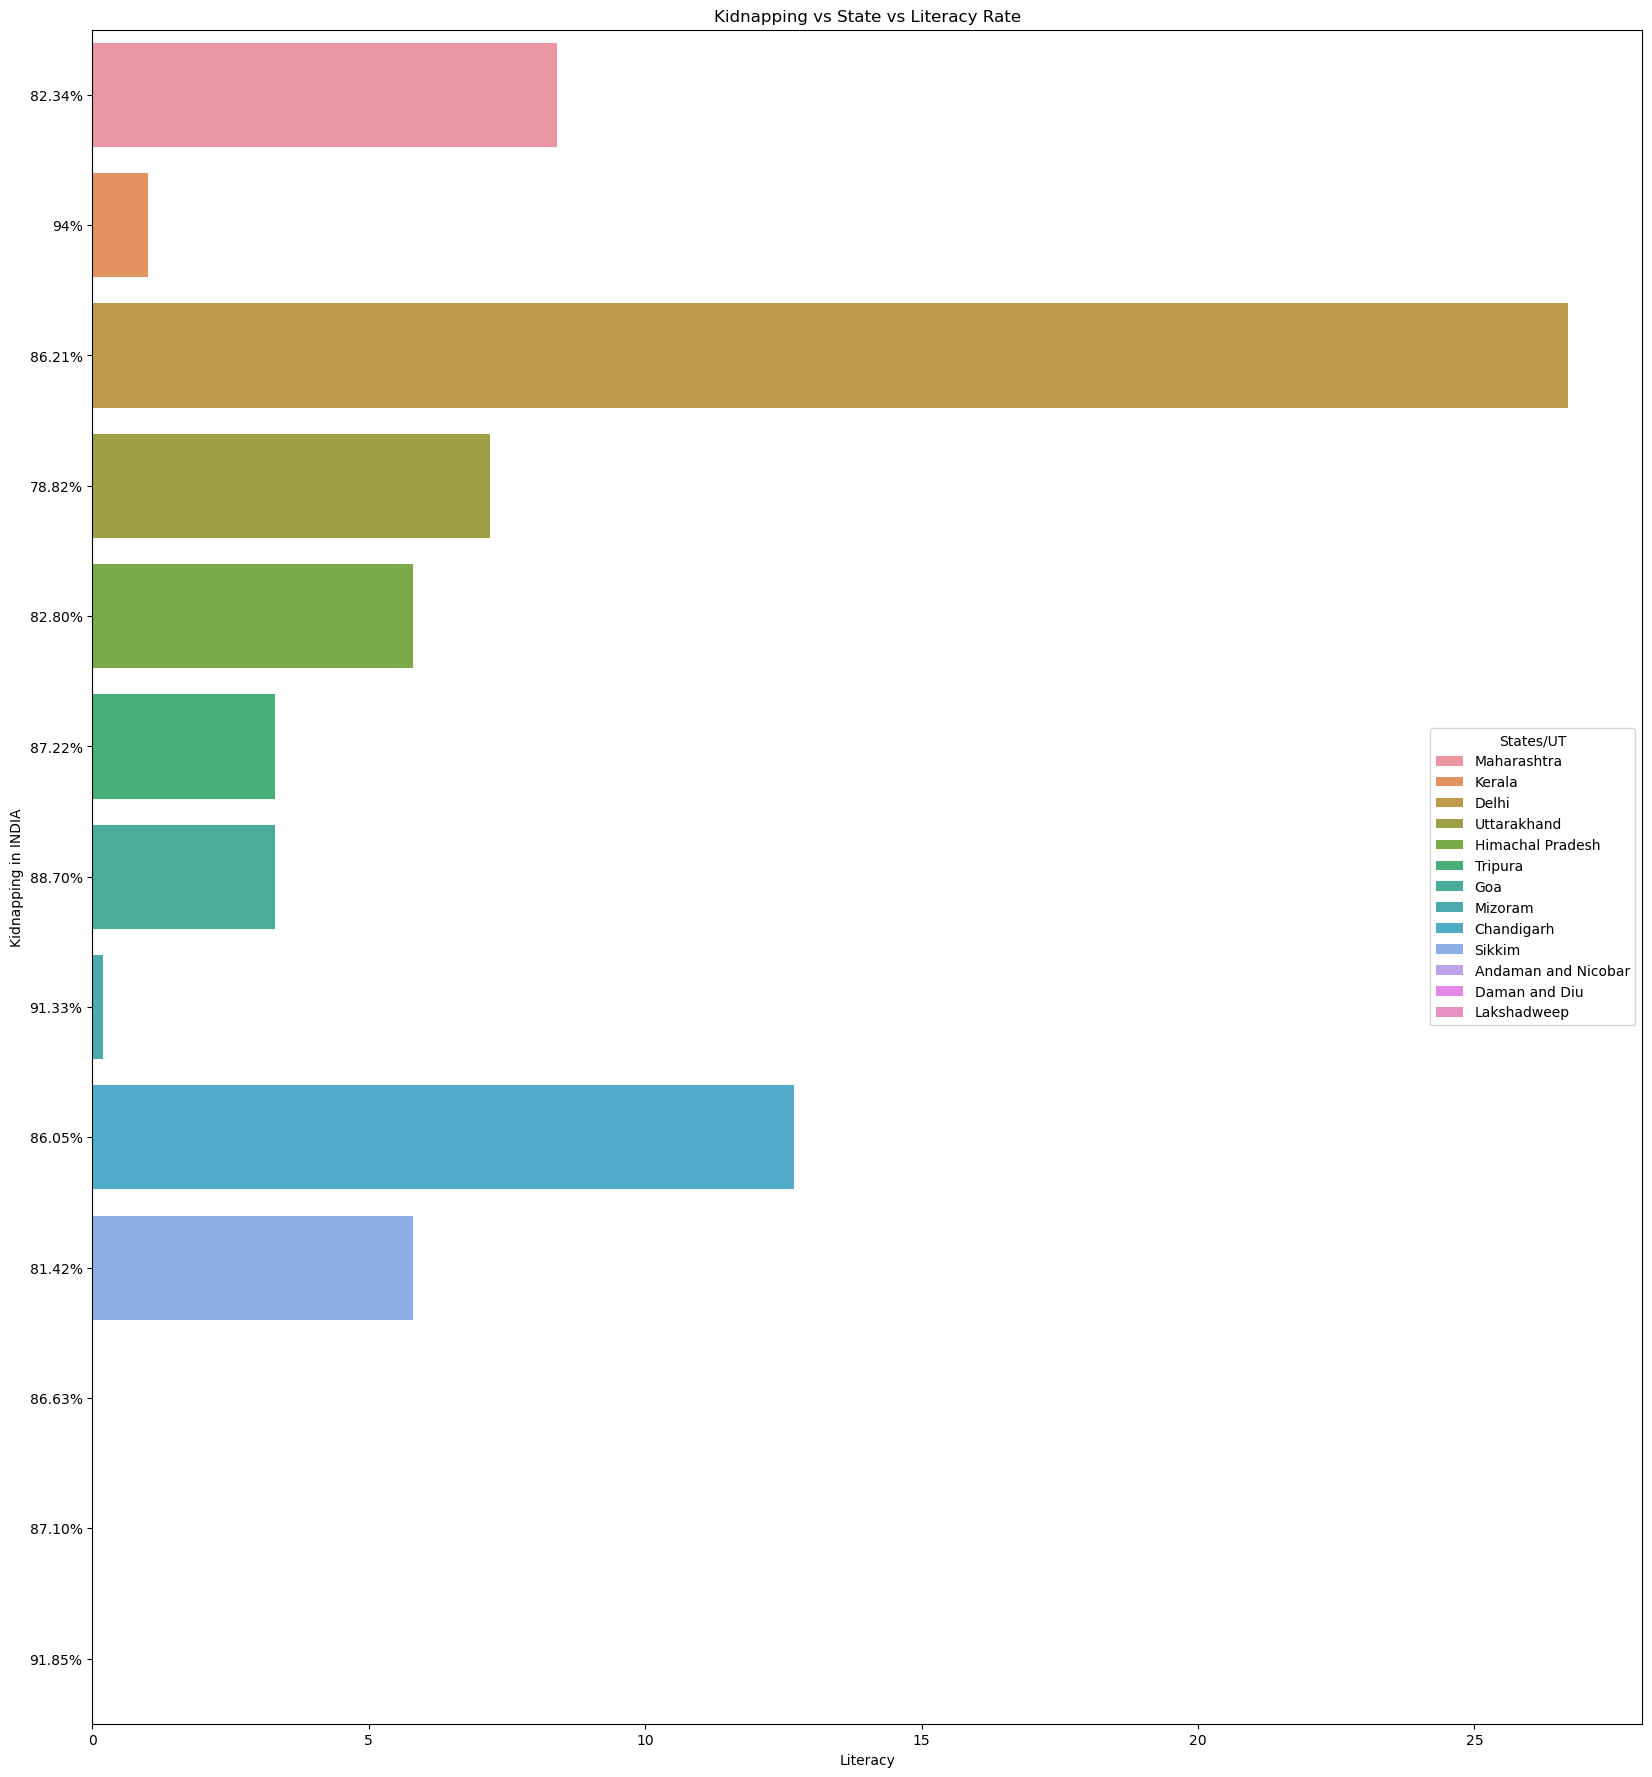

In [87]:
plt.figure(figsize=(20,22))
sns.barplot(x='Kidnapping', y='Literacy', hue='States/UT', data=Moderate_area, dodge=False)
plt.title('Kidnapping vs State vs Literacy Rate')
plt.xlabel('Literacy')
plt.ylabel('Kidnapping in INDIA')
plt.show()

Above barplot represent the kidnapping and literacy rates. On x axis we can see all the literacy rate for each states on y axis we can see the kidnapping rates.

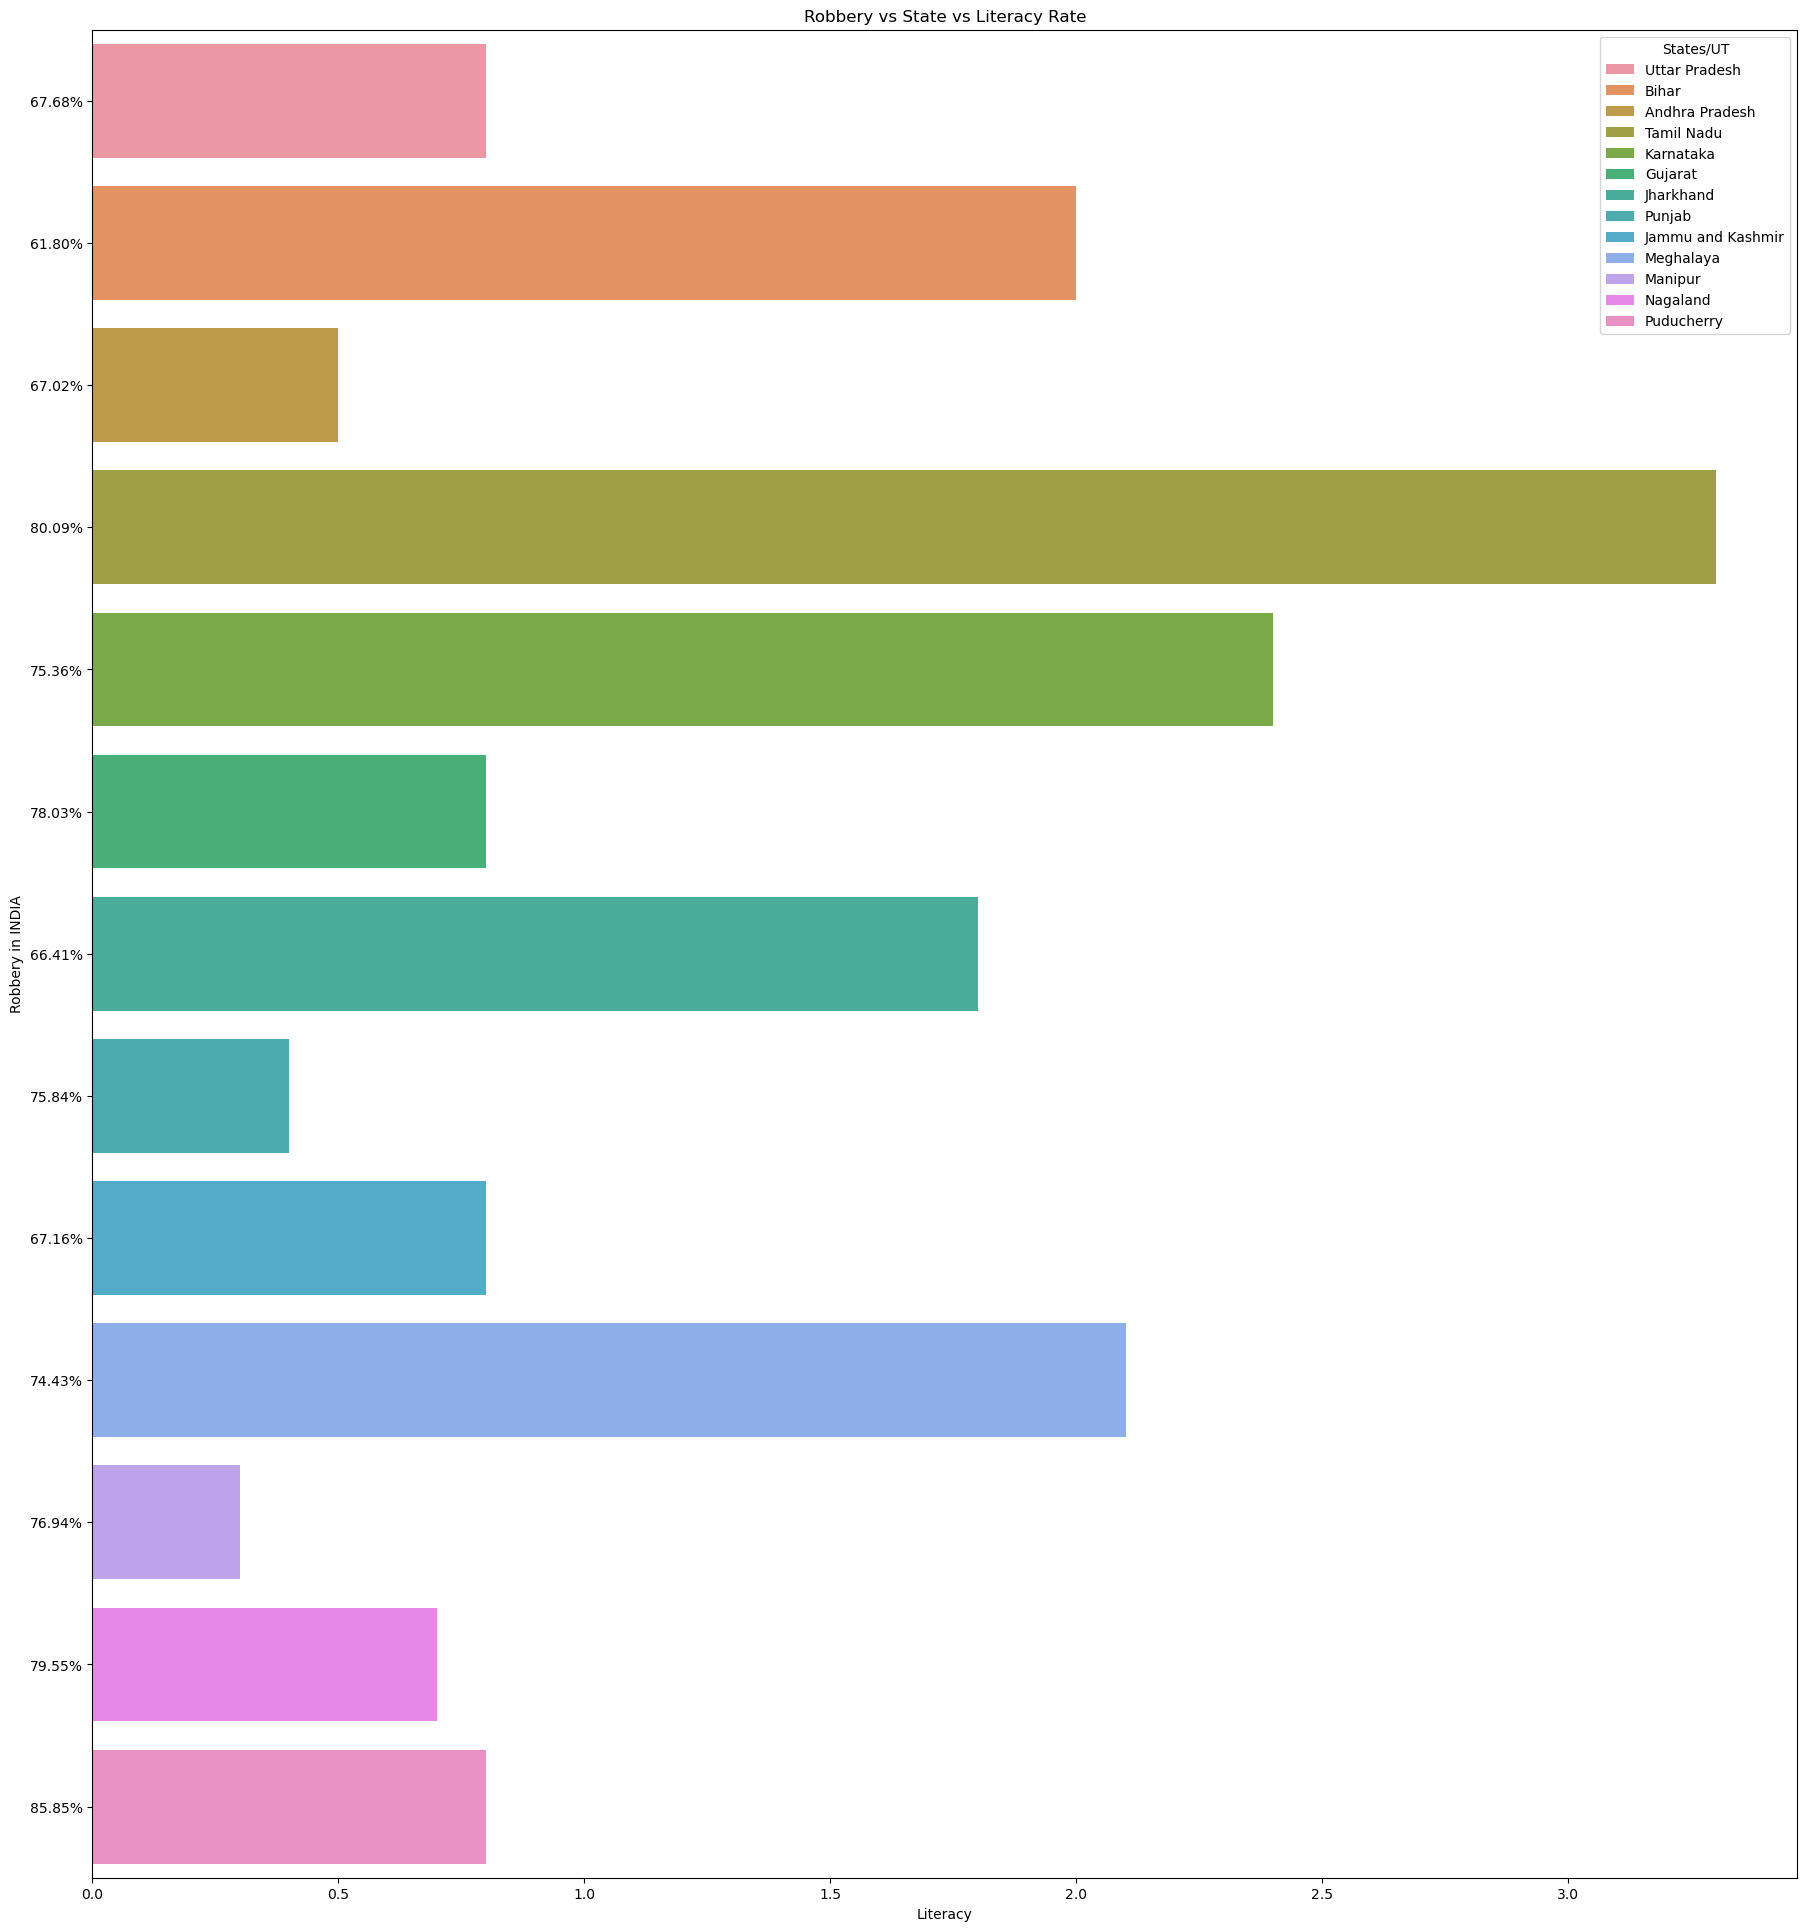

In [88]:
plt.figure(figsize=(22,24))
sns.barplot(x='Robbery', y='Literacy', hue='States/UT', data=Peaceful_area, dodge=False)
plt.title('Robbery vs State vs Literacy Rate')
plt.xlabel('Literacy')
plt.ylabel('Robbery in INDIA')
plt.show()

Above barplot represents the robbery and literacy for each states. This is the easisiest way to analyse the crime rate through the barplot. 

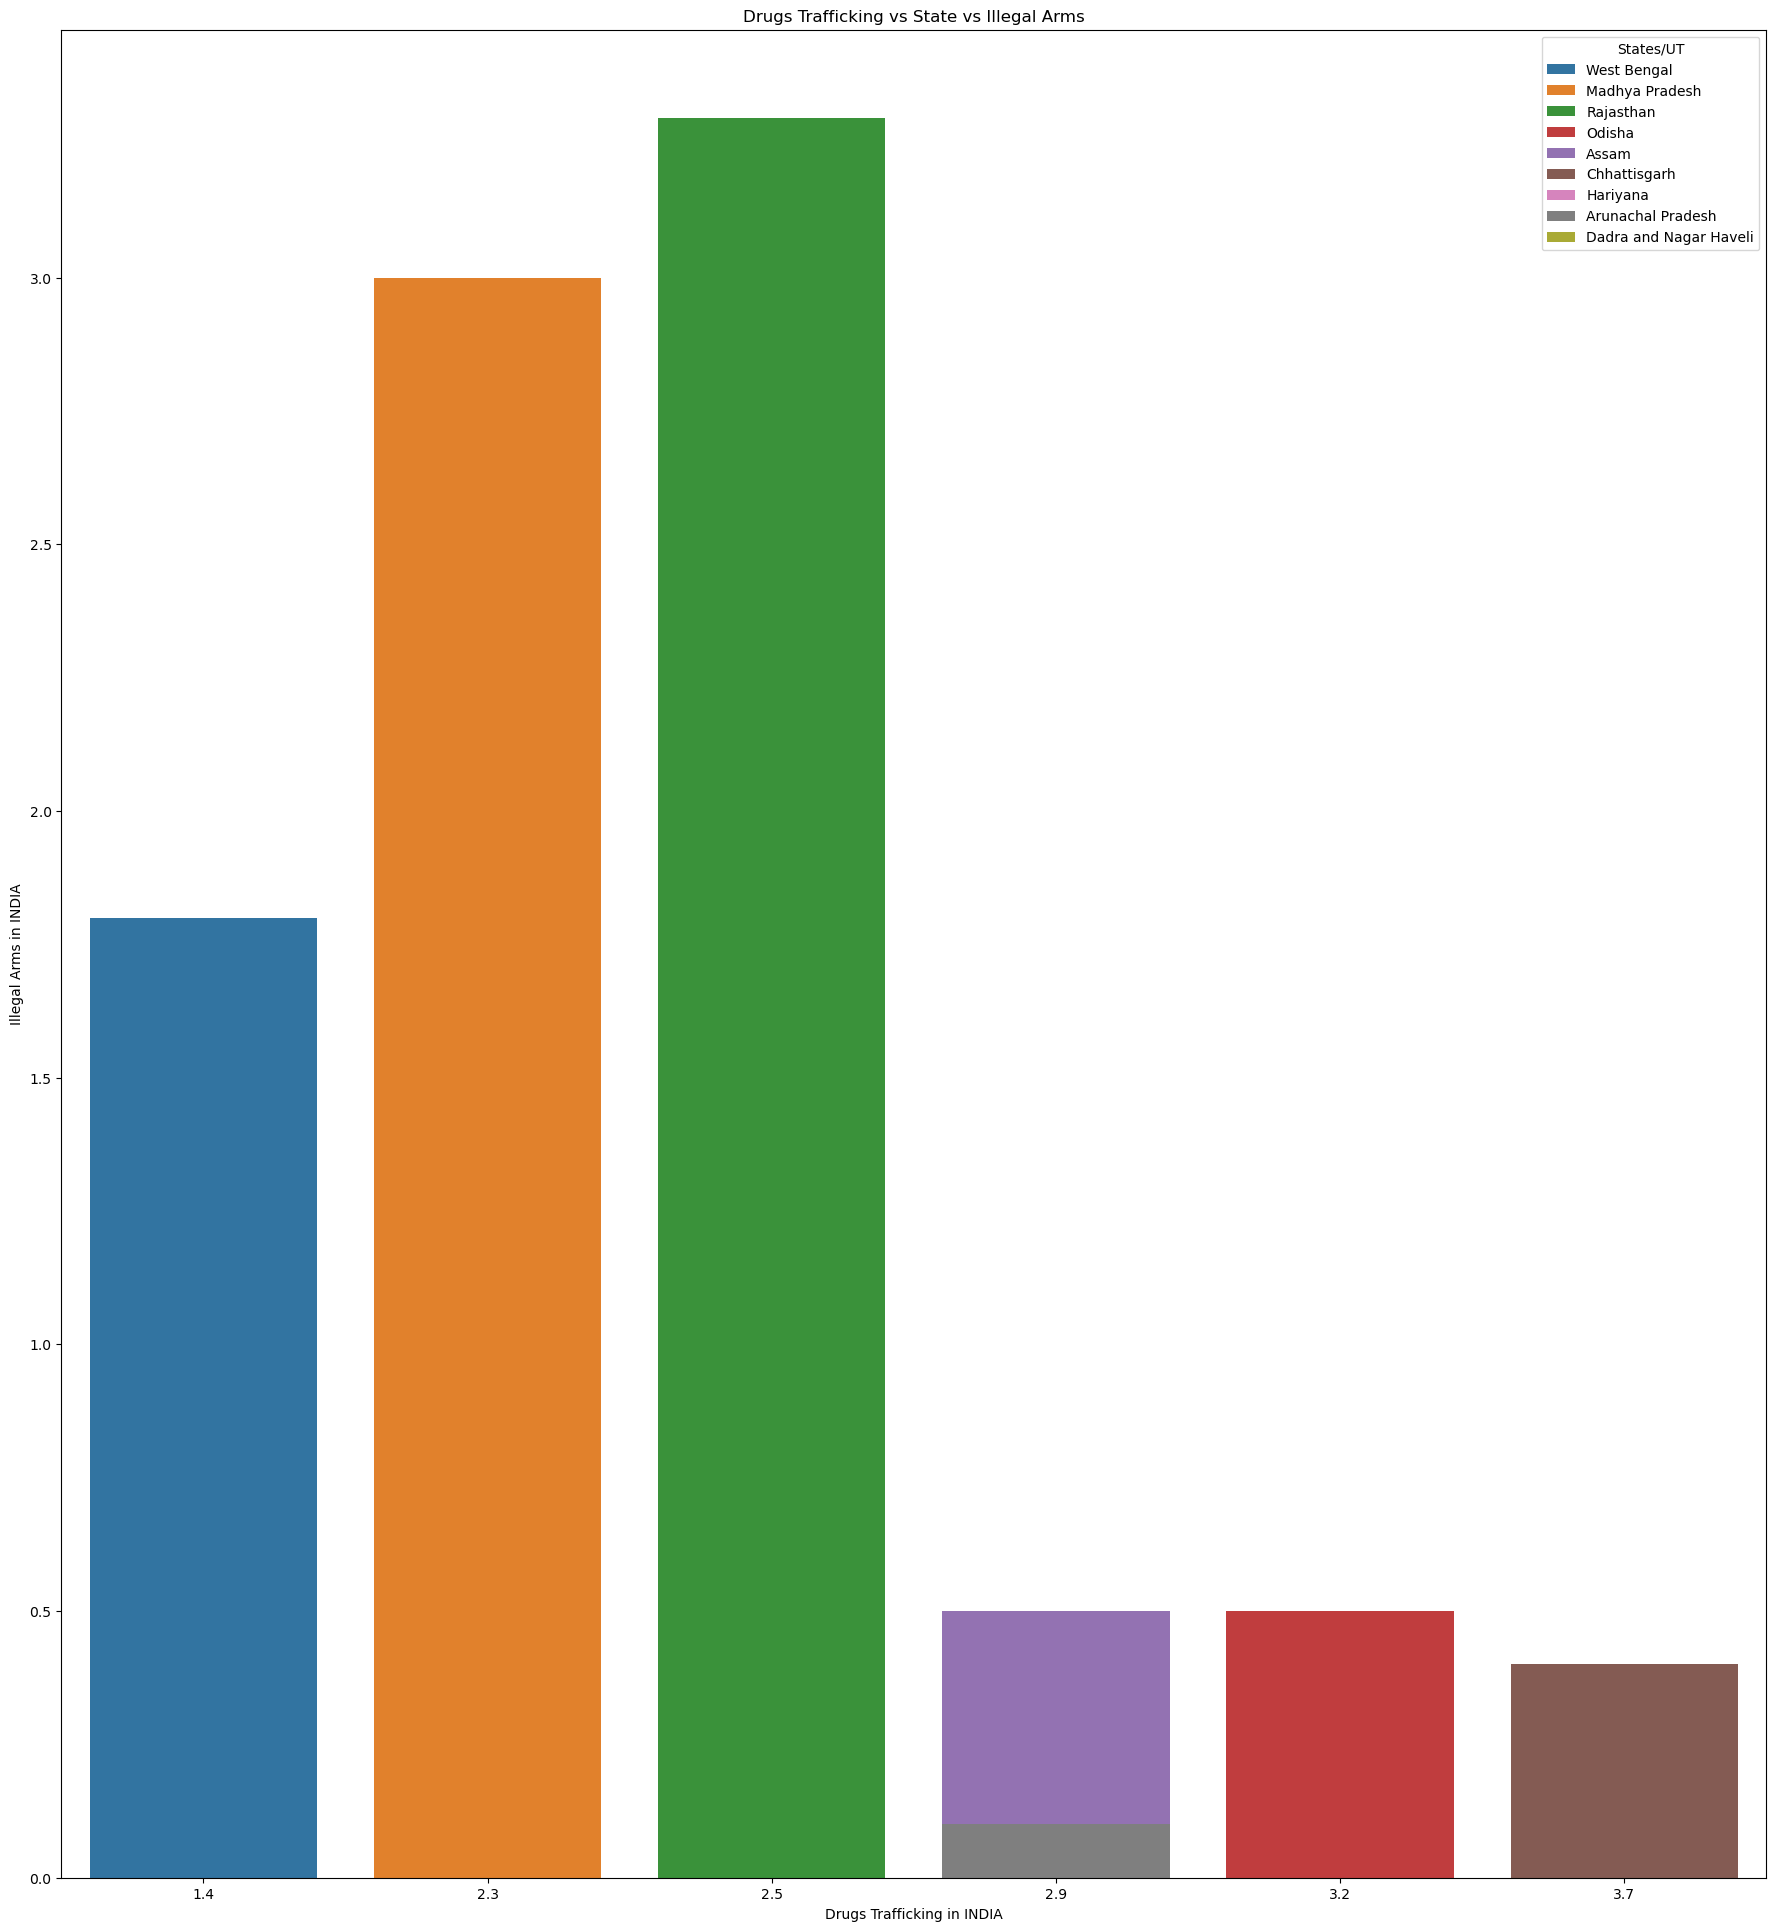

In [89]:
plt.figure(figsize=(22,24))
sns.barplot(x='Drugs Trafficking', y='Illegal Arms', hue='States/UT', data=Sensitive_area, dodge=False)
plt.title('Drugs Trafficking vs State vs Illegal Arms')
plt.xlabel('Drugs Trafficking in INDIA')
plt.ylabel('Illegal Arms in INDIA')
plt.show()

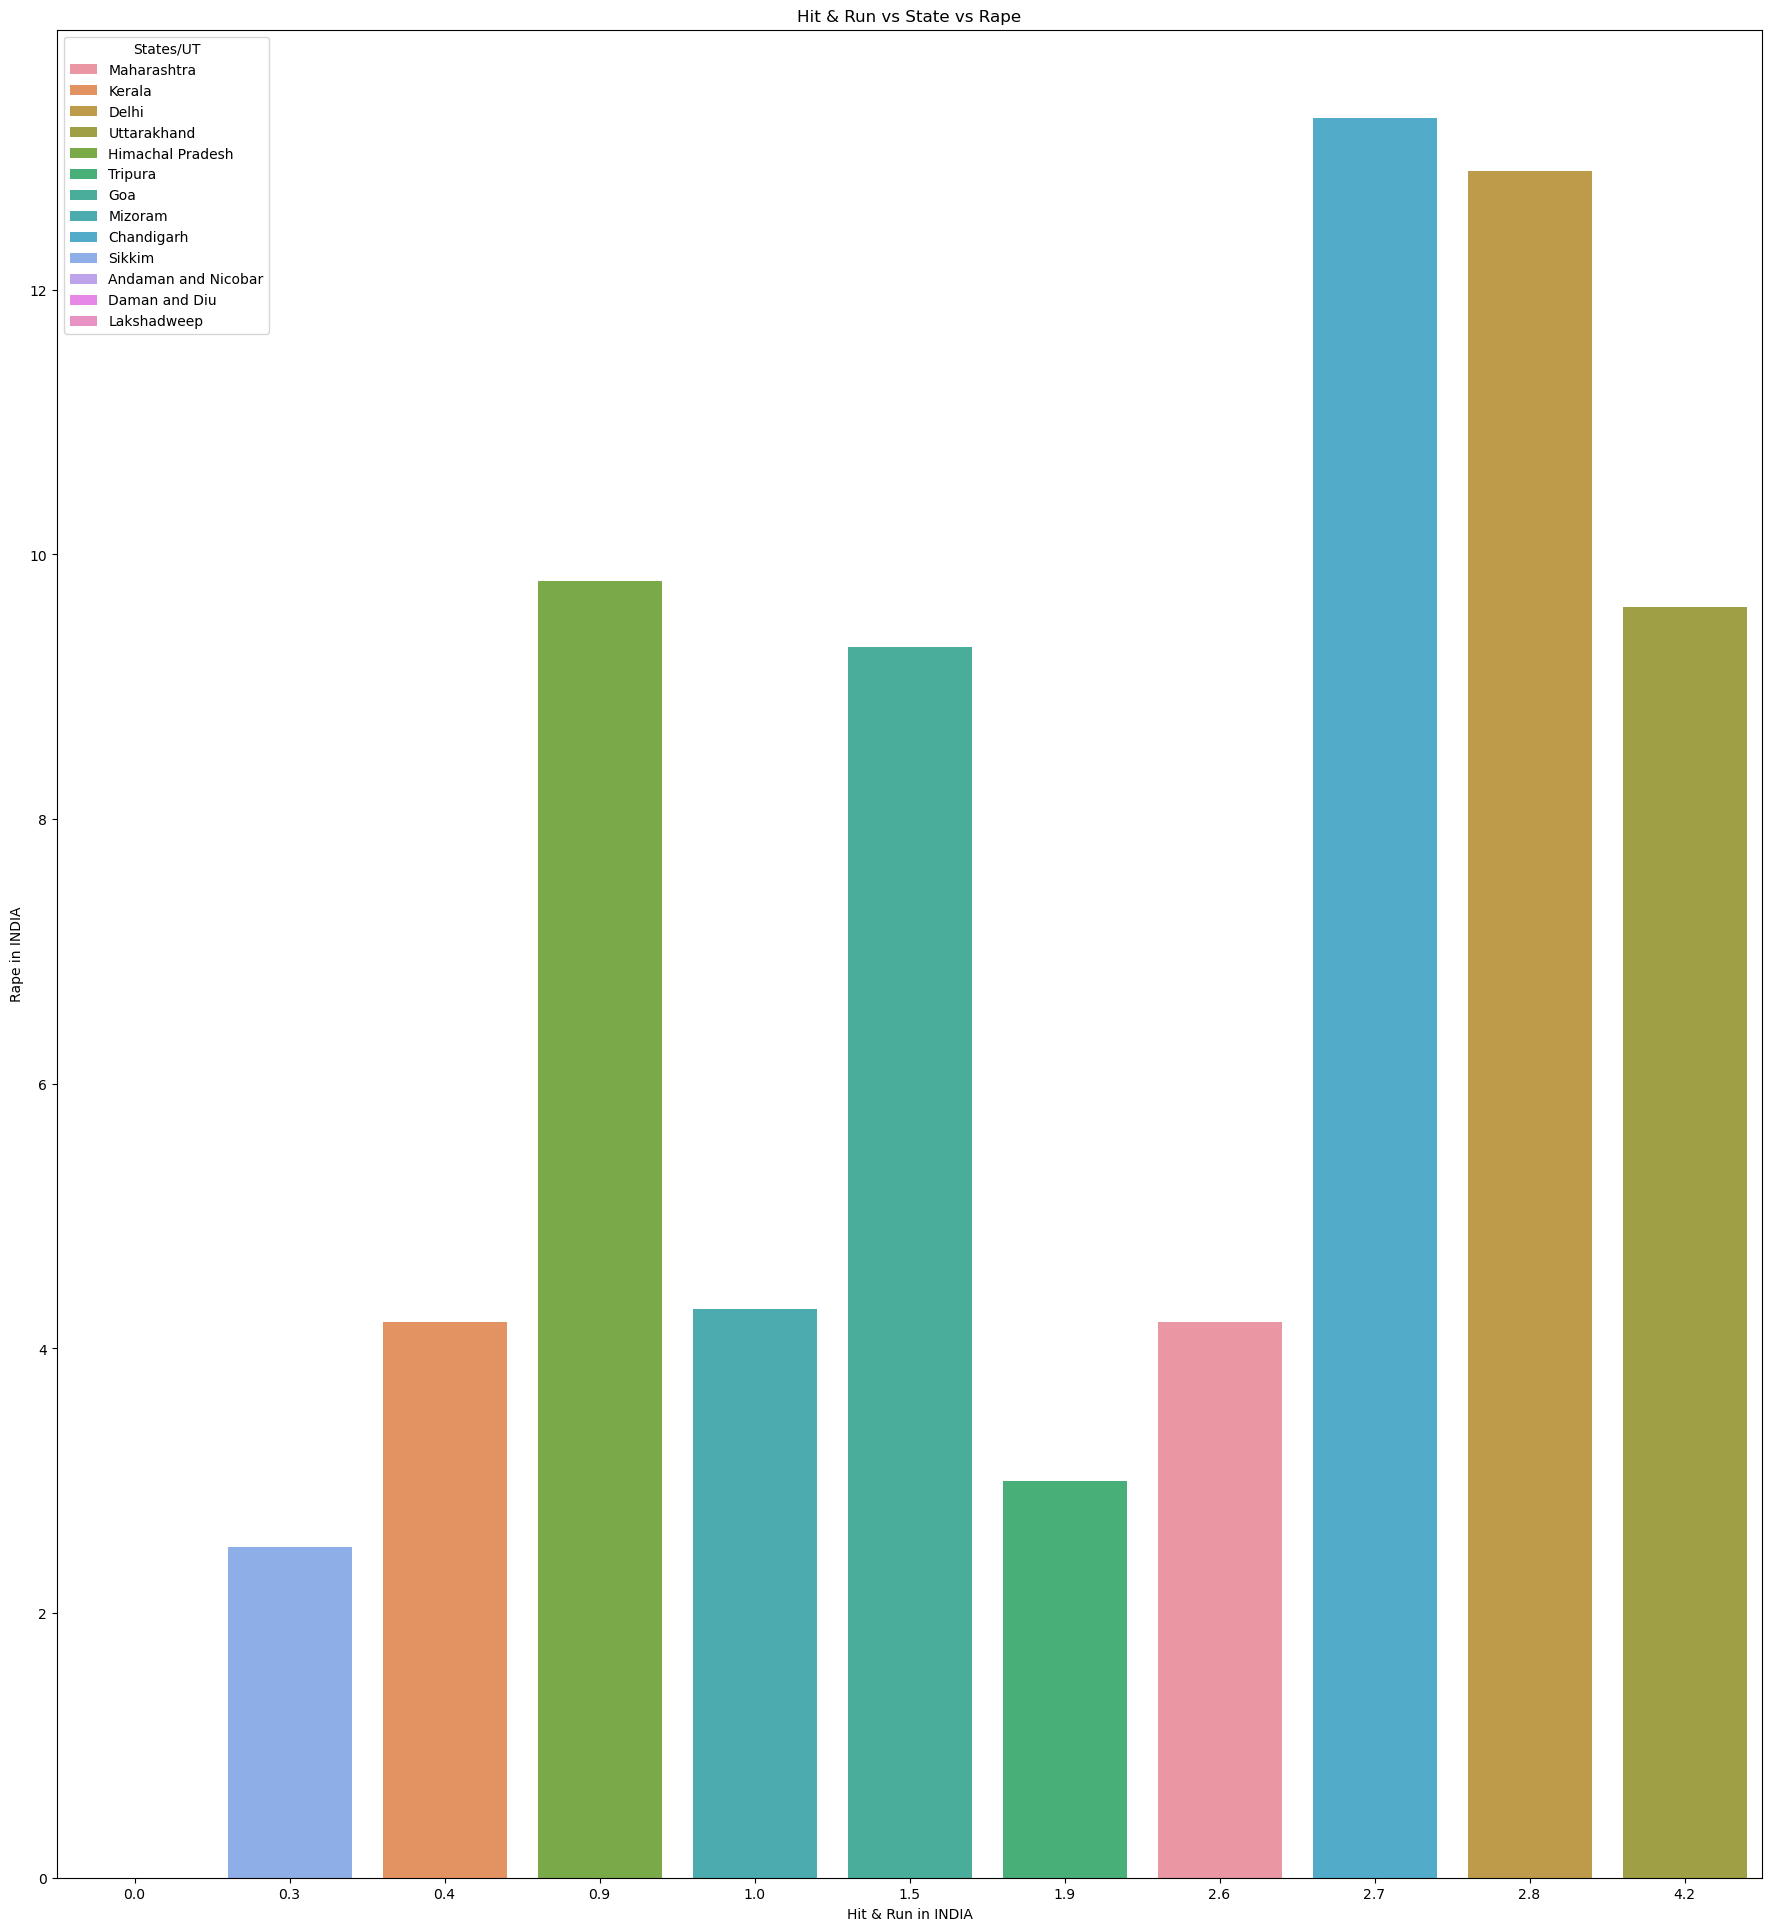

In [90]:
plt.figure(figsize=(22,24))
sns.barplot(x='Hit & Run', y='Rape', hue='States/UT', data=Moderate_area, dodge=False)
plt.title('Hit & Run vs State vs Rape')
plt.xlabel('Hit & Run in INDIA')
plt.ylabel('Rape in INDIA')
plt.show()

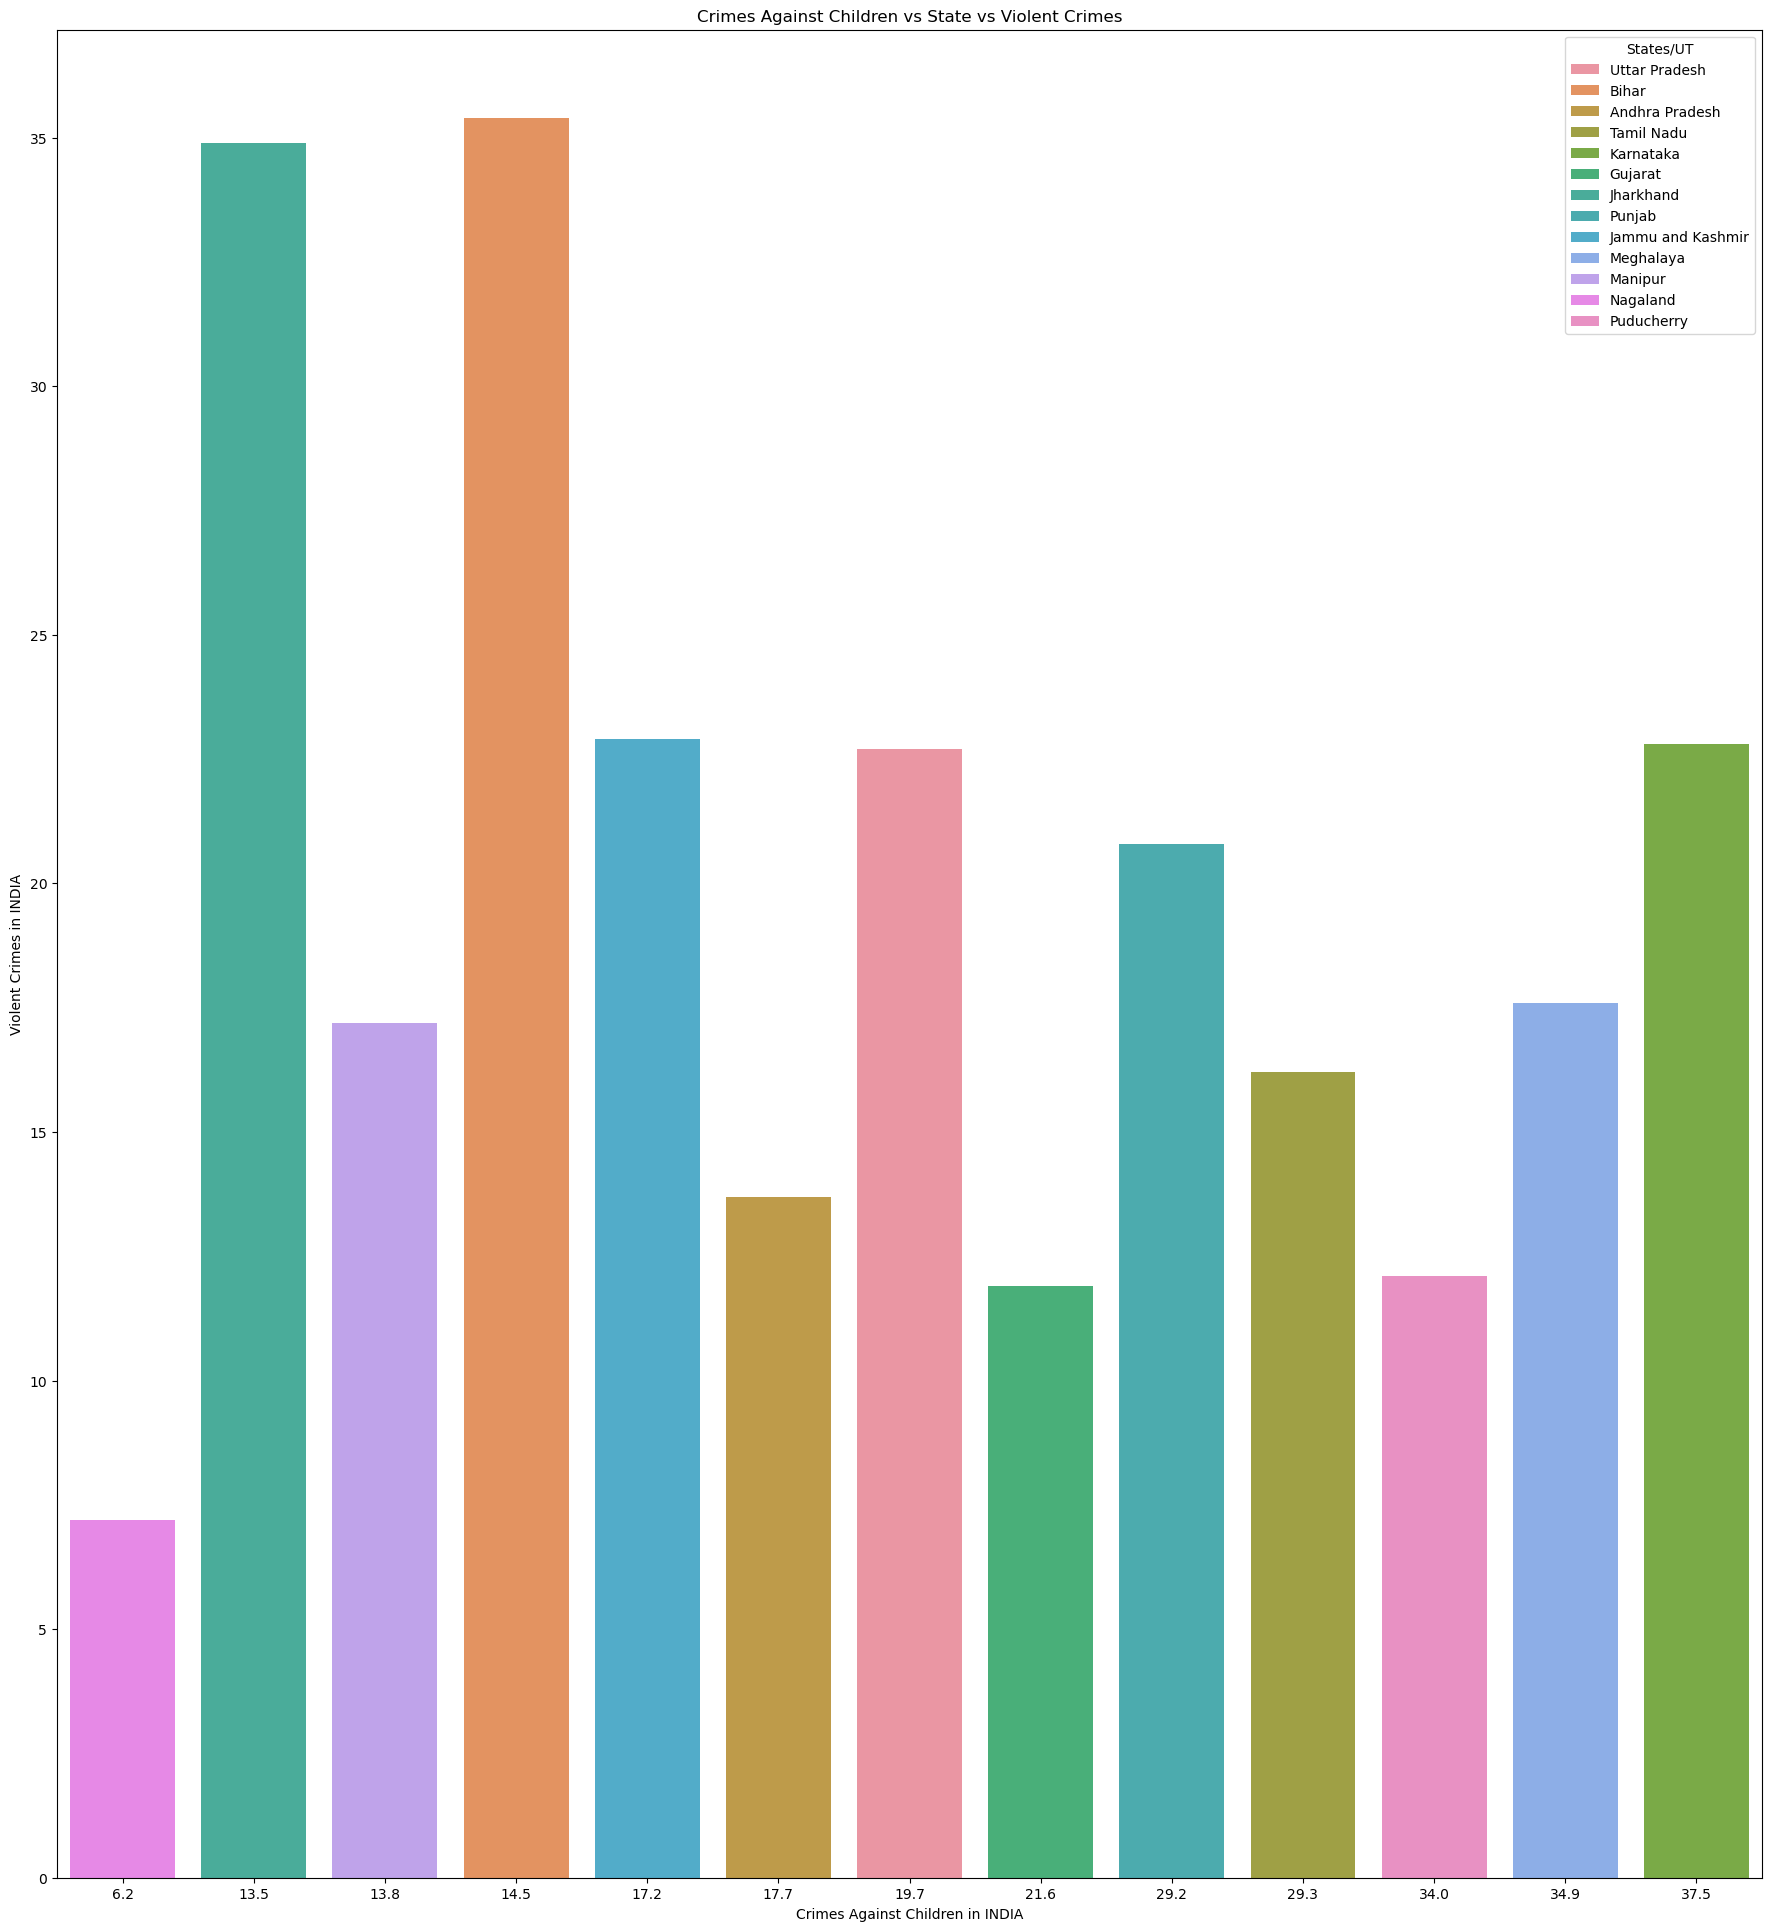

In [91]:
plt.figure(figsize=(22,24))
sns.barplot(x='Crimes Against Children', y='Violent Crimes', hue='States/UT', data=Peaceful_area, dodge=False)
plt.title('Crimes Against Children vs State vs Violent Crimes')
plt.xlabel('Crimes Against Children in INDIA')
plt.ylabel('Violent Crimes in INDIA')
plt.show()

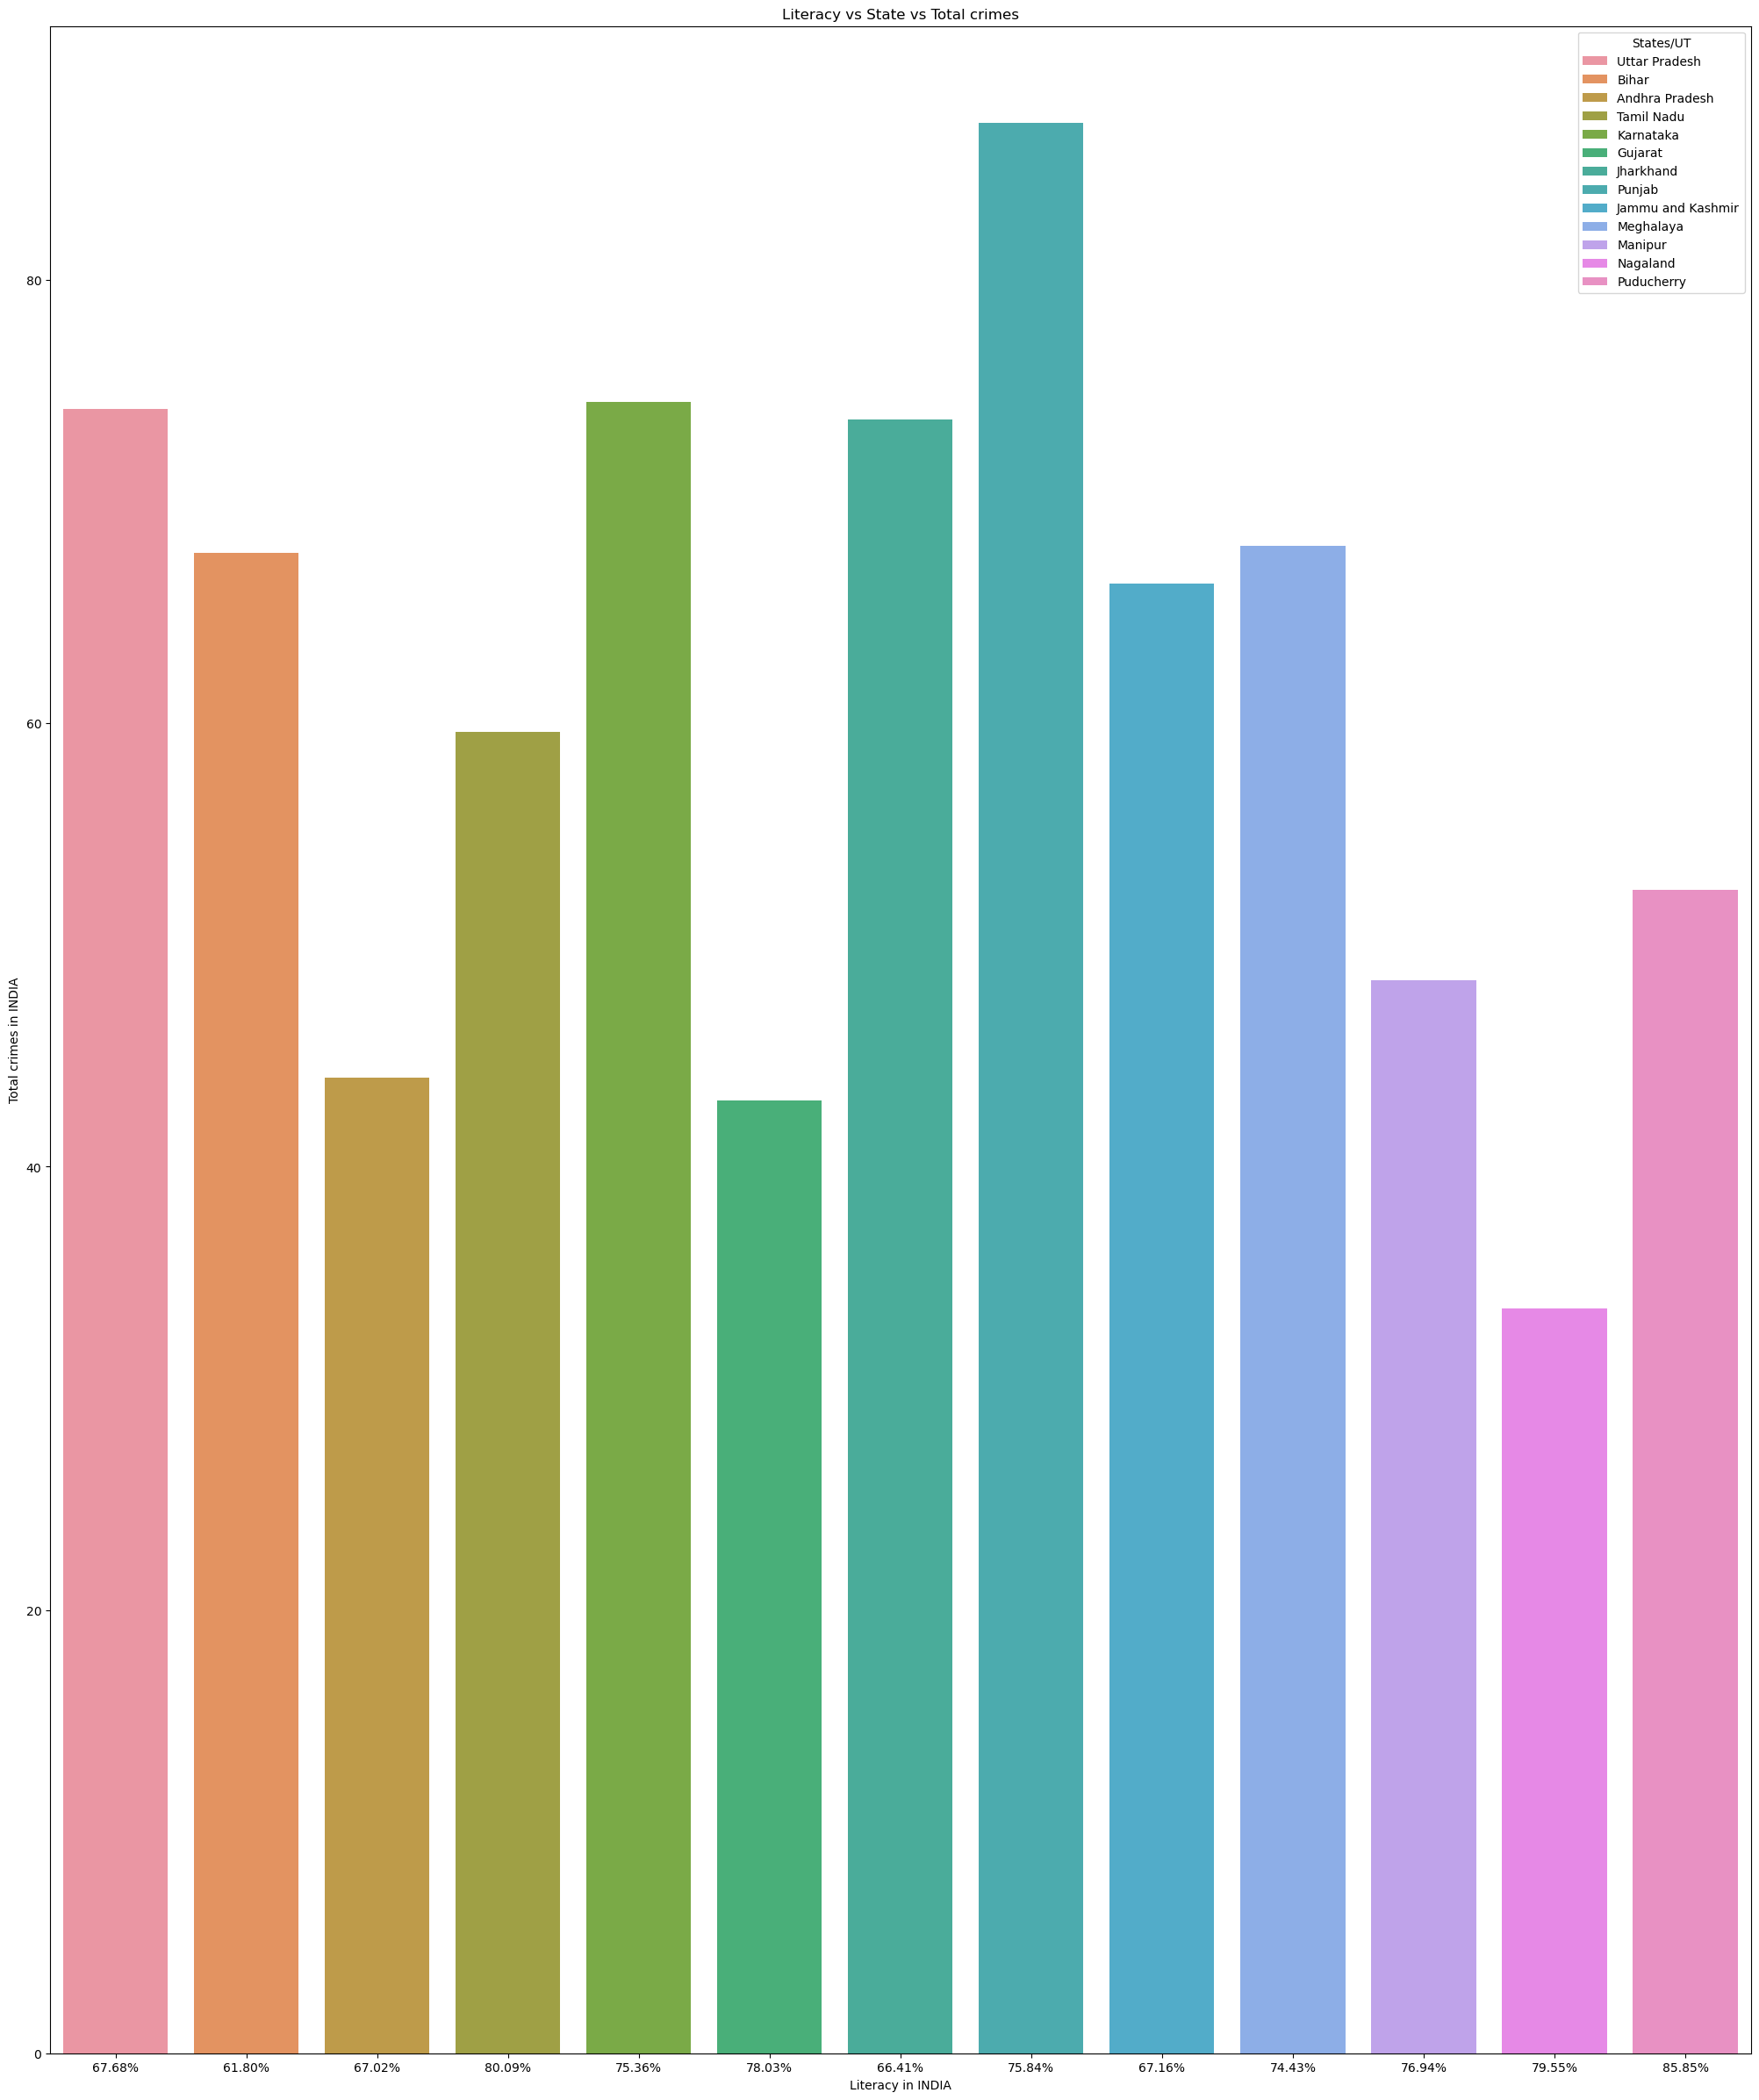

In [92]:
plt.figure(figsize=(25,30))
sns.barplot(x='Literacy', y='Total crimes', hue='States/UT', data=Peaceful_area, dodge=False)
plt.title('Literacy vs State vs Total crimes')
plt.xlabel('Literacy in INDIA')
plt.ylabel('Total crimes in INDIA')
plt.show()

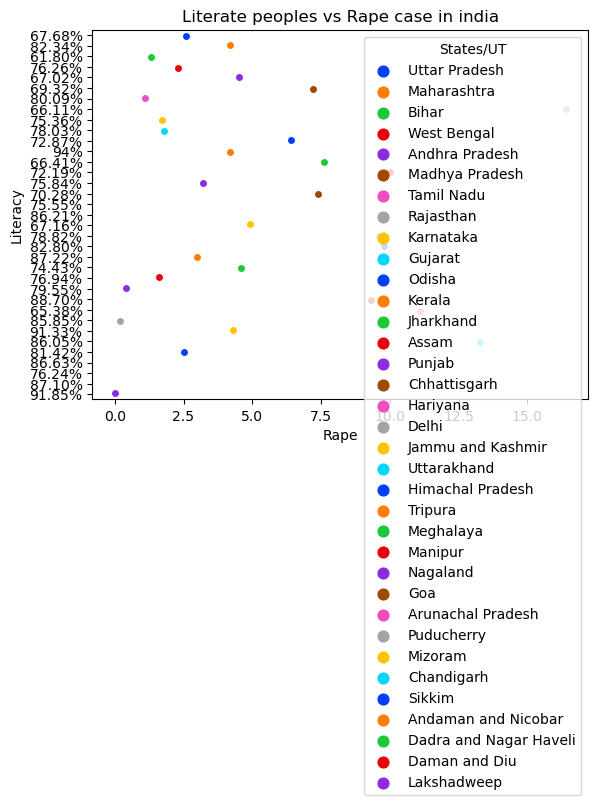

In [94]:
figuresize = (30,28)
plt.title("Literate peoples vs Rape case in india")
sns.stripplot(x='Rape', y='Literacy', hue='States/UT', data=merged_data, palette='bright')
plt.show()

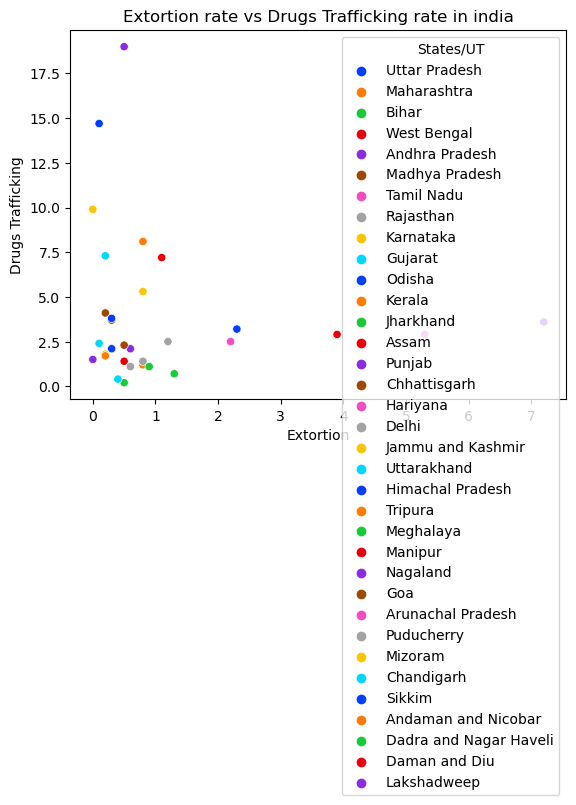

In [95]:
figuresize = (30,28)
plt.title("Extortion rate vs Drugs Trafficking rate in india")
sns.scatterplot(x='Extortion', y='Drugs Trafficking', hue='States/UT', data=merged_data, palette='bright')
plt.show()

 Bar plot, also known as a bar chart or bar graph, is a graphical representation of categorical data that uses rectangular bars to represent the values of different categories. Bar plots are useful for visualizing and comparing the quantities or frequencies of different categories or groups. Above barplots and scatterplots are used to represent the different types of crimes in India along with the state and Ut name also represent the literacy rates foppr each states. 

4.4 Capstone project story- Capstone project was the real databse project. We get to collect the data of real world and analyse them. We get to know more about the real world datas and how to analyse and represent them with bargraphs, scatterplot, stripplots etc. This is helpful in many ways for students. A capstone project is a culminating and comprehensive project that serves as a culmination of a student's learning experience. It is often undertaken in the final year of a degree program, especially in graduate programs, and it integrates the knowledge and skills acquired throughout the course of study. Capstone projects are designed to showcase a student's ability to apply theoretical knowledge to real-world problems or scenarios.

Capstone projects serve several important purposes, providing students with a valuable learning experience and helping them develop essential skills. Here are some of the key uses and benefits of capstone projects:

1) Integration of Knowledge:

Capstone projects allow students to integrate and apply the knowledge they have gained throughout their academic program. It provides a platform for synthesizing information from various courses and disciplines. Capstone project helps in revised all the important topics with the help of project. This is found usefull for the practice and real world project analysis. 

2) Real-World Application:

Capstone projects often involve solving real-world problems or addressing challenges relevant to the field of study. This practical application helps bridge the gap between academic learning and real-world scenarios. In this capstone project we get to work on the real databased which was related to the Crime rate, literacy rate, population, areas for each states. We can easily analyse the database and represent then with barplots, scatterplots, stripplots etc.

3) Skill Development:

Students engage in a range of activities during capstone projects, such as research, analysis, problem-solving, and project management. These experiences contribute to the development of critical skills that are valuable in both academic and professional settings.
Research Experience:

Capstone projects typically require students to conduct independent research. This experience helps them develop research skills, including literature review, data collection, analysis, and interpretation.

4) Critical Thinking and Analysis:

Capstone projects encourage students to think critically and analyze information in a comprehensive manner. They must evaluate different perspectives, consider evidence, and make informed decisions.
Demonstration of Competence:

Completing a capstone project demonstrates a student's competence in the subject matter. It serves as evidence of their ability to apply theoretical knowledge to practical situations.
Preparation for Professional Challenges:

Capstone projects simulate the types of challenges students may face in their professional careers. This experience prepares them for the complexities and demands of the workplace.

5) Portfolio Development:

The final product of a capstone project, whether it's a report, presentation, or tangible output, can be included in a student's portfolio. This portfolio can be valuable when seeking employment or applying for further education.

6) Communication and Presentation Skills:

Many capstone projects involve presenting findings to an audience, honing students' communication and presentation skills. This is crucial for effectively conveying complex information in a clear and compelling manner.

7) Interdisciplinary Learning:

In some cases, capstone projects encourage interdisciplinary learning by requiring students to draw on knowledge from multiple fields. This broadens their perspective and fosters a holistic approach to problem-solving.

8) Culminating Academic Experience:

Capstone projects often serve as the culminating academic experience, allowing students to showcase the depth and breadth of their learning as they prepare to graduate.
Overall, capstone projects are designed to be a capstone experience, bringing together the academic, intellectual, and practical aspects of a student's education in a meaningful and impactful way.

9) Independent Research:

Students typically engage in independent research as part of their capstone project. This may involve literature reviews, data collection and analysis, experimentation, or other research methodologies.
Problem Solving:

Capstone projects are often focused on solving a particular problem or addressing a challenge. Students are expected to demonstrate their problem-solving skills and critical thinking abilities.

10) Presentation and Communication Skills:


Many capstone projects involve a presentation component where students communicate their findings, methods, and recommendations to a broader audience. This helps develop presentation and communication skills.

11) Long-Term Planning:

Capstone projects often require careful planning and time management. Students need to organize their work over an extended period, simulating a real-world project timeline.

